In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score


In [38]:

data = pd.read_csv('gene_expression_dataset.csv')
labels = pd.read_csv('labels.csv')

# 2. Rename the first column to 'sample_id' so we can merge cleanly
data.rename(columns={'Unnamed: 0': 'sample_id'}, inplace=True)
labels.rename(columns={'Unnamed: 0': 'sample_id'}, inplace=True)



merged_df = pd.merge(data, labels, on='sample_id', how='inner')



X = merged_df.drop(['sample_id', 'Class'], axis=1)

y = merged_df['Class']


print("New X shape:", X.shape)
print("New y shape:", y.shape)


New X shape: (179, 20531)
New y shape: (179,)


In [39]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = np.nan_to_num(X_scaled)

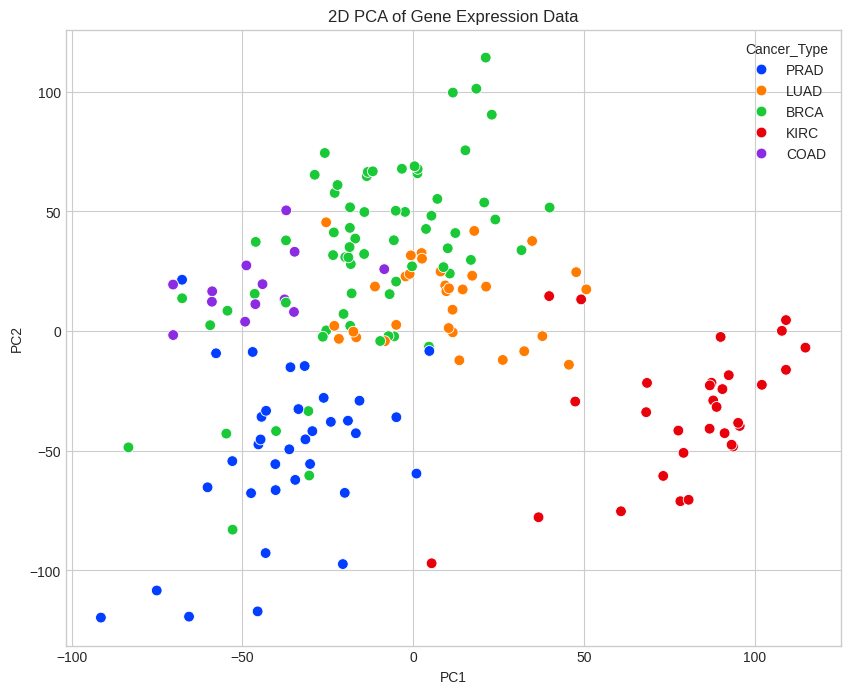

In [40]:


# 1. Initialize PCA to reduce to 2 dimensions
pca = PCA(n_components=2)






X_pca = pca.fit_transform(X_scaled)

X_pca = pca.fit_transform(X_scaled)


pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


pca_df['Cancer_Type'] = y.values


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cancer_Type', data=pca_df, palette='bright', s=60)
plt.title('2D PCA of Gene Expression Data')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 179 samples in 0.059s...
[t-SNE] Computed neighbors for 179 samples in 0.120s...
[t-SNE] Computed conditional probabilities for sample 179 / 179
[t-SNE] Mean sigma: 62.771435
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.123173
[t-SNE] KL divergence after 300 iterations: 0.340546


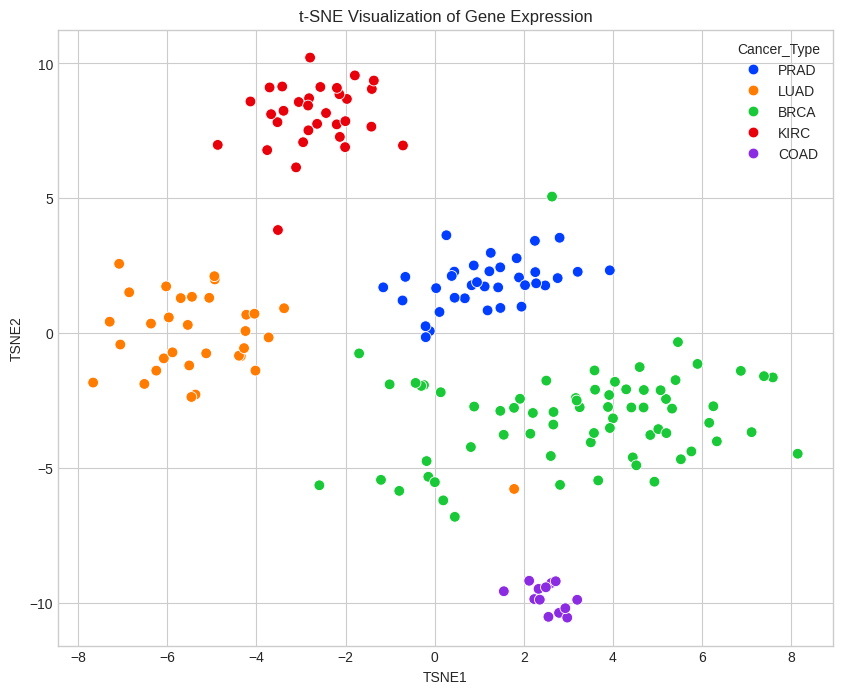

In [41]:



tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cancer_Type'] = y.values


plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cancer_Type', data=tsne_df, palette='bright', s=60)
plt.title('t-SNE Visualization of Gene Expression')

plt.show()

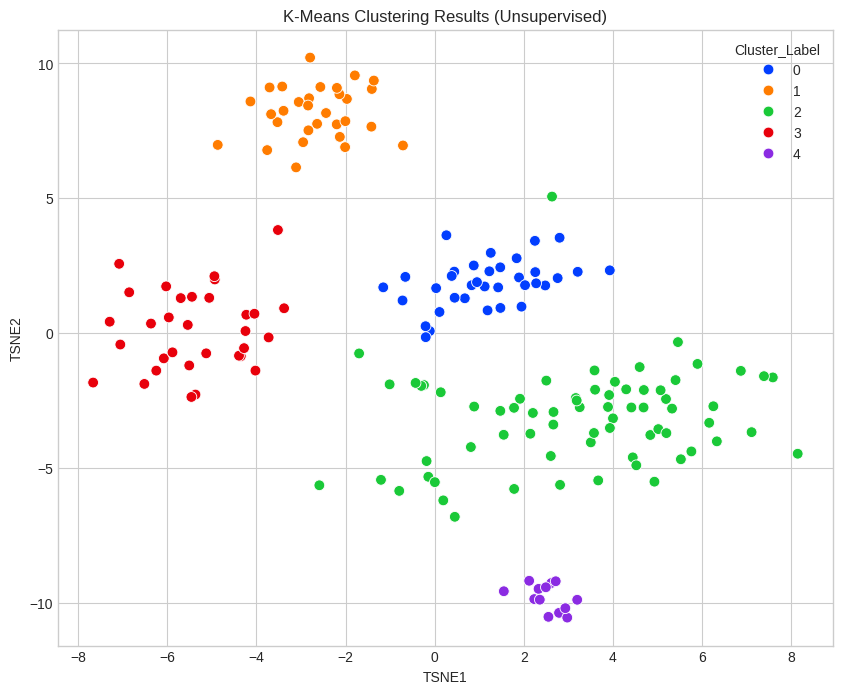

In [42]:



kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


tsne_df['Cluster_Label'] = clusters


plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster_Label', data=tsne_df, palette='bright', s=60)
plt.title('K-Means Clustering Results (Unsupervised)')
plt.show()


In [43]:


score = adjusted_rand_score(y, clusters)
print(f"Clustering Accuracy Score (ARI): {score:.2f}")

Clustering Accuracy Score (ARI): 0.97


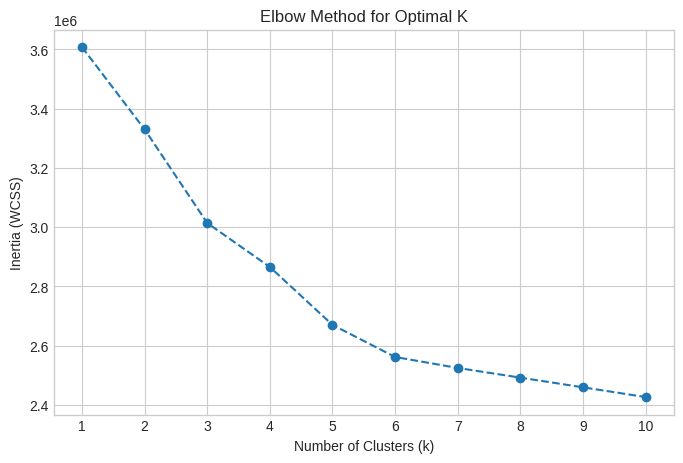

In [36]:

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 2. Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(K_range)
plt.grid(True)
plt.show()